The following notebook will explore any trends between the air quality data and the weather data. Both datasets contain hourly measurements.

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read in cleaned air quality and weather dataframes
weather_data = pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\1-Data_cleaning\weather_data_cleaned.csv")
aq_data = pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\1-Data_cleaning\aq_data_cleaned.csv")

print(weather_data.head())
print(aq_data.head())

              Datetime  TEMP_MEAN_(C)  WDIR_VECT_(DEG)  WDIR_UVEC_(DEG)  \
0  2019-01-01 01:00:00            0.8            272.7            273.2   
1  2019-01-01 02:00:00            0.8            274.6            275.0   
2  2019-01-01 03:00:00            1.2            274.9            274.8   
3  2019-01-01 04:00:00            0.7            268.3            268.6   
4  2019-01-01 05:00:00            1.1            263.5            263.6   

   WSPD_SCLR_(M/S)  HUMIDITY_(%)  
0             10.0          67.1  
1              8.8          66.8  
2              8.4          66.0  
3              7.7          68.6  
4             10.4          69.6  
              Datetime  NOx  SO2    NO   NO2  TRS     O3
0  2018-12-31 00:00:00  0.6  0.4  0.00  0.60  0.6  38.30
1  2019-01-01 01:00:00  1.2  0.4  0.20  1.00  0.7  37.60
2  2019-01-01 02:00:00  0.9  0.3  0.15  0.75  0.4  37.85
3  2019-01-01 03:00:00  0.6  0.2  0.10  0.50  0.1  38.10
4  2019-01-01 04:00:00  1.7  0.1  0.10  1.60  0.0  36.

In [3]:
# merge the two datasets based on their datetime indexes
aq_weather = weather_data.merge(right=aq_data,
                                how='inner')

# reset index as DateTimeIndex
aq_weather['Datetime'] = pd.to_datetime(aq_weather['Datetime'].astype("string"))
aq_weather = aq_weather.set_index(pd.DatetimeIndex(aq_weather['Datetime']))
aq_weather.drop(['Datetime'], axis=1, inplace=True)

# view information and dataframe
print(aq_weather.info())
aq_weather.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26303 entries, 2019-01-01 01:00:00 to 2021-12-31 23:00:00
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEMP_MEAN_(C)    26303 non-null  float64
 1   WDIR_VECT_(DEG)  26303 non-null  float64
 2   WDIR_UVEC_(DEG)  26303 non-null  float64
 3   WSPD_SCLR_(M/S)  26303 non-null  float64
 4   HUMIDITY_(%)     26303 non-null  float64
 5   NOx              26303 non-null  float64
 6   SO2              26303 non-null  float64
 7   NO               26303 non-null  float64
 8   NO2              26303 non-null  float64
 9   TRS              26303 non-null  float64
 10  O3               26303 non-null  float64
dtypes: float64(11)
memory usage: 2.4 MB
None


,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%),NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,,,,,,
2019-01-01 01:00:00,0.8,272.7,273.2,10.0,67.1,1.2,0.4,0.20,1.00,0.7,37.60
2019-01-01 02:00:00,0.8,274.6,275.0,8.8,66.8,0.9,0.3,0.15,0.75,0.4,37.85
2019-01-01 03:00:00,1.2,274.9,274.8,8.4,66.0,0.6,0.2,0.10,0.50,0.1,38.10
2019-01-01 04:00:00,0.7,268.3,268.6,7.7,68.6,1.7,0.1,0.10,1.60,0.0,36.70
2019-01-01 05:00:00,1.1,263.5,263.6,10.4,69.6,0.5,0.1,0.10,0.30,0.0,37.90


In [10]:
# Resample dataframe on daily mean values and monthly mean values
aq_weather_daily = aq_weather.resample('D').mean()
aq_weather_weekly = aq_weather.resample('W').mean()
aq_weather_monthly = aq_weather_daily.resample('M').mean()

The effect of the weather variables on each pollutant will now be explored. The weekly and monthly mean values will be used to get rid of any monitor noise.

In [ ]:
# Explore the impact of weather variables on each pollutant


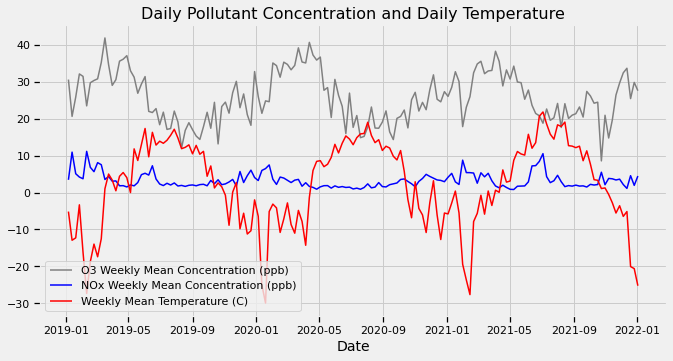

In [41]:
# Explore impact of temperature on ozone concentration

plt.figure(figsize=(10,5))

plt.plot(aq_weather_weekly.index, aq_weather_weekly['O3'], 'gray', label = 'O3 Weekly Mean Concentration (ppb)')
plt.plot(aq_weather_weekly.index, aq_weather_weekly['NOx'], 'blue', label = 'NOx Weekly Mean Concentration (ppb)')
plt.plot(aq_weather_weekly.index, aq_weather_weekly['TEMP_MEAN_(C)'], 'r', label = 'Weekly Mean Temperature (C)')

plt.xlabel('Date', fontsize=14)
plt.legend()


plt.title('Daily Pollutant Concentration and Daily Temperature', fontsize=16)
plt.show()

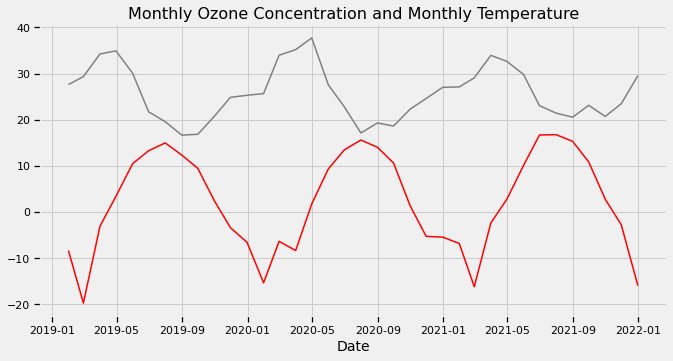

In [6]:
plt.figure(figsize=(10,5))

plt.plot(aq_weather_monthly.index, aq_weather_monthly['O3'], 'gray', label = 'Monthly Mean Concentration (ppb)')
plt.plot(aq_weather_monthly.index, aq_weather_monthly['TEMP_MEAN_(C)'], 'r', label = 'Monthly Mean Temperature (C)')

plt.xlabel('Date', fontsize=14)


plt.title('Monthly Ozone Concentration and Monthly Temperature', fontsize=16)
plt.show()

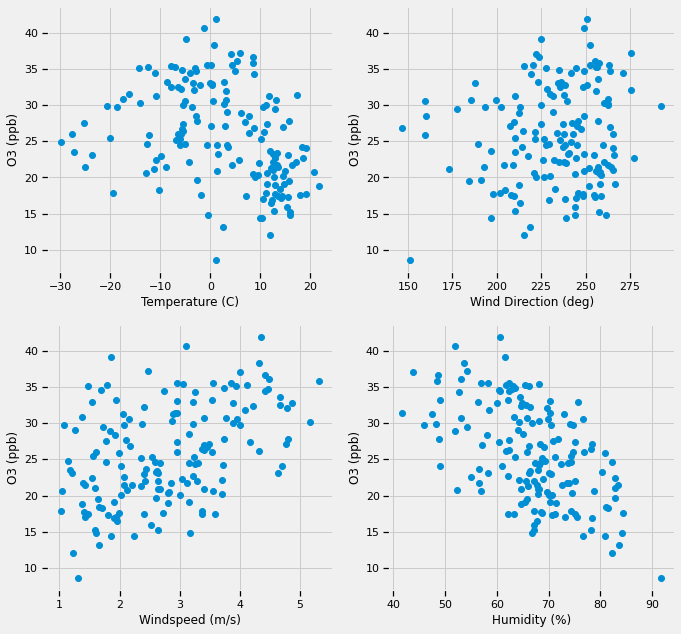

In [21]:
# Ozone
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['O3']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'O3 (ppb)')

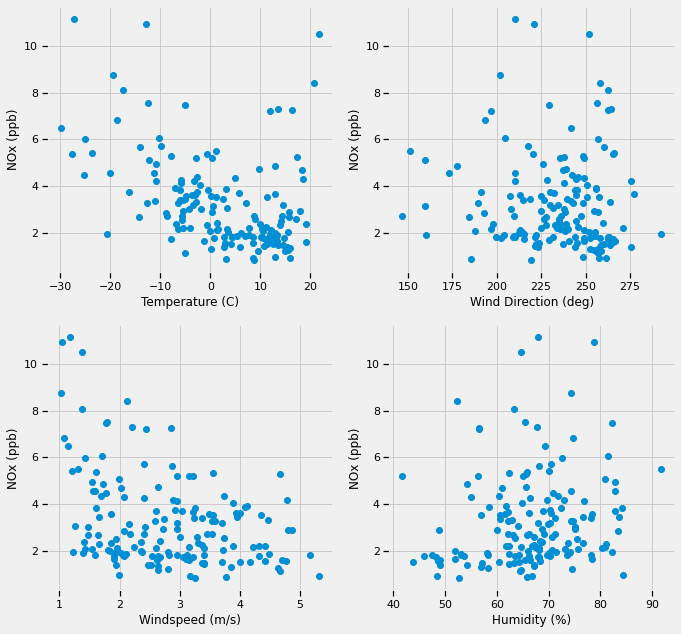

In [22]:
# NOx
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['NOx']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'NOx (ppb)')

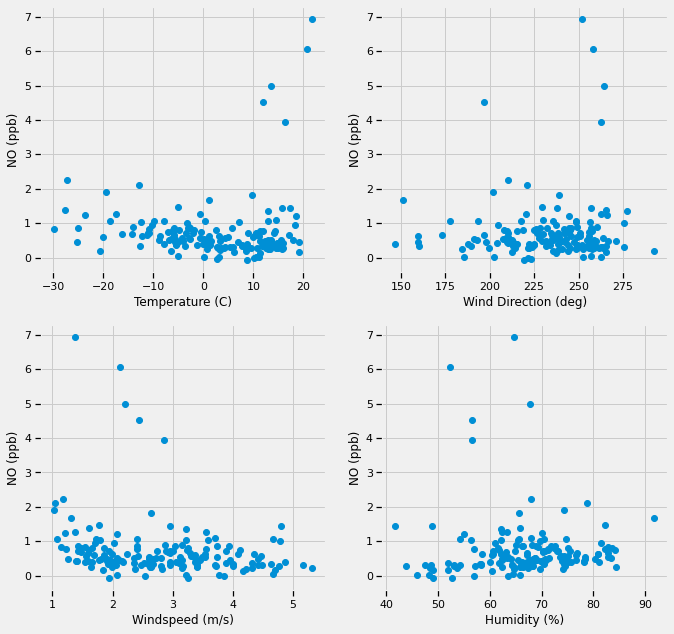

In [23]:
# NO
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['NO']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'NO (ppb)')

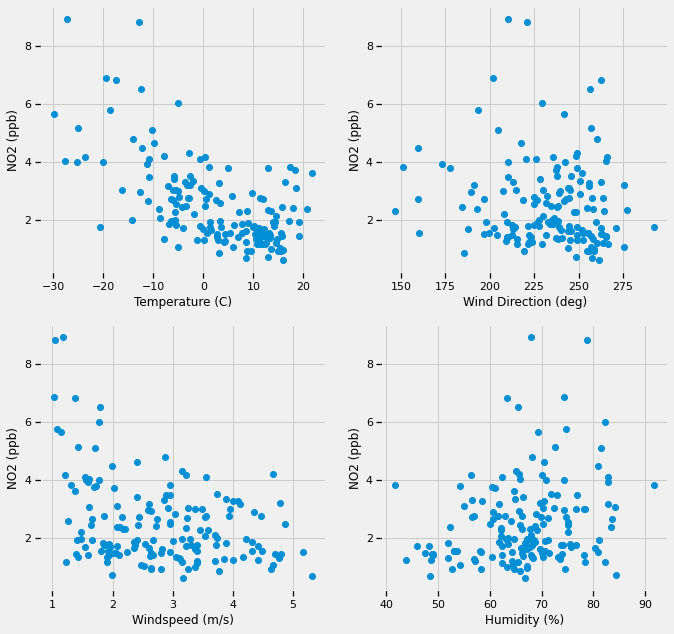

In [24]:
# NO2
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['NO2']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'NO2 (ppb)')

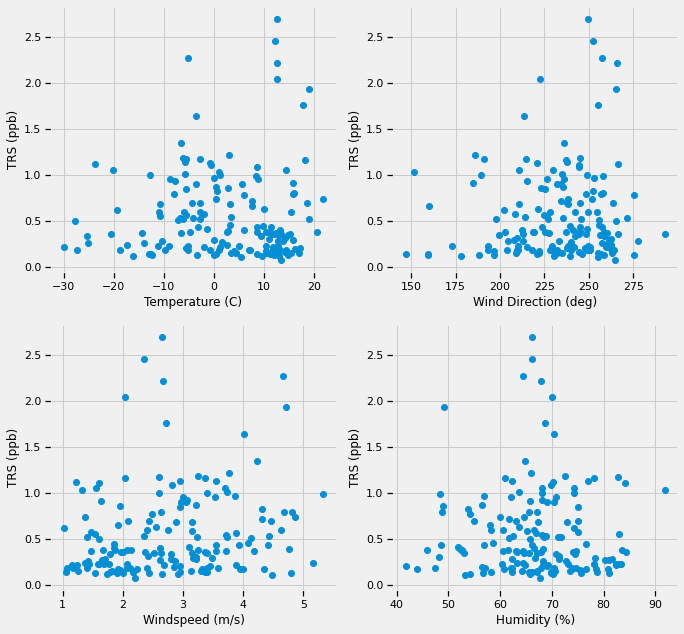

In [25]:
# TRS
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['TRS']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'TRS (ppb)')

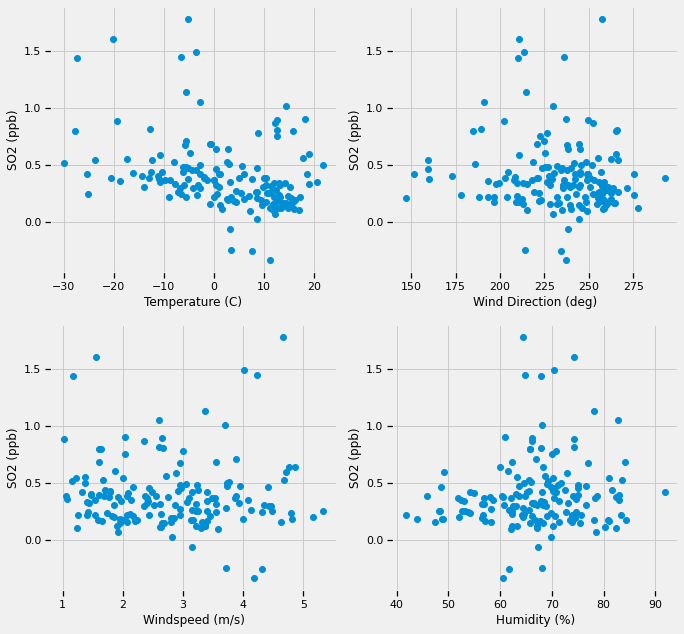

In [26]:
# SO2
x1 = aq_weather_weekly['TEMP_MEAN_(C)']
x2 = aq_weather_weekly['WDIR_VECT_(DEG)']
x3 = aq_weather_weekly['WSPD_SCLR_(M/S)']
x4 = aq_weather_weekly['HUMIDITY_(%)']
y = aq_weather_weekly['SO2']

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].scatter(x1,y)
axs[0,0].set(xlabel='Temperature (C)')

axs[0,1].scatter(x2,y)
axs[0,1].set(xlabel='Wind Direction (deg)')

axs[1,0].scatter(x3,y)
axs[1,0].set(xlabel='Windspeed (m/s)')

axs[1,1].scatter(x4,y)
axs[1,1].set(xlabel='Humidity (%)')

for ax in axs.flat:
    ax.set(ylabel = 'SO2 (ppb)')

Text(0.5, 1.0, 'Correlation Heatmap using Daily Means')

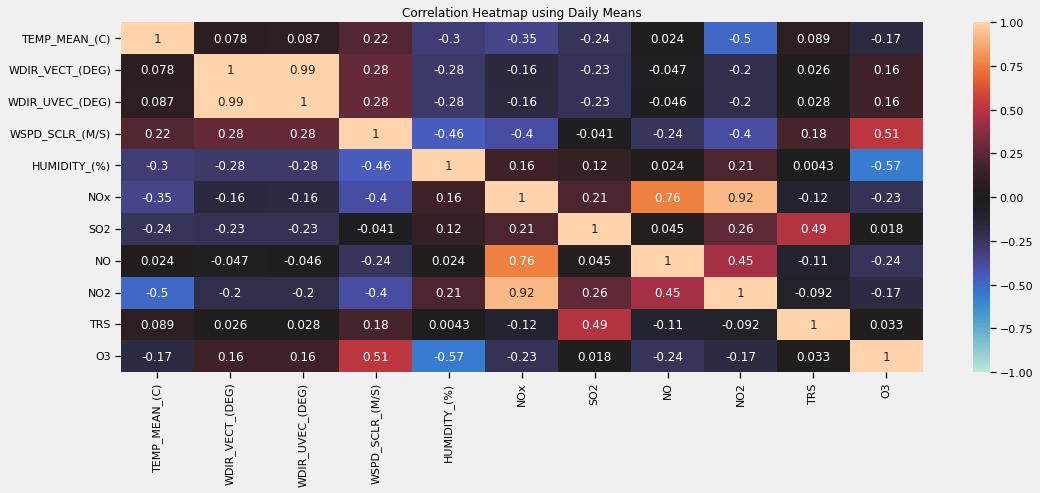

In [35]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(aq_weather_daily.corr(), vmin=-1, vmax=1, annot=True, cmap='icefire')

heatmap.set_title('Correlation Heatmap using Daily Means')

Text(0.5, 1.0, 'Correlation Heatmap using Weekly Means')

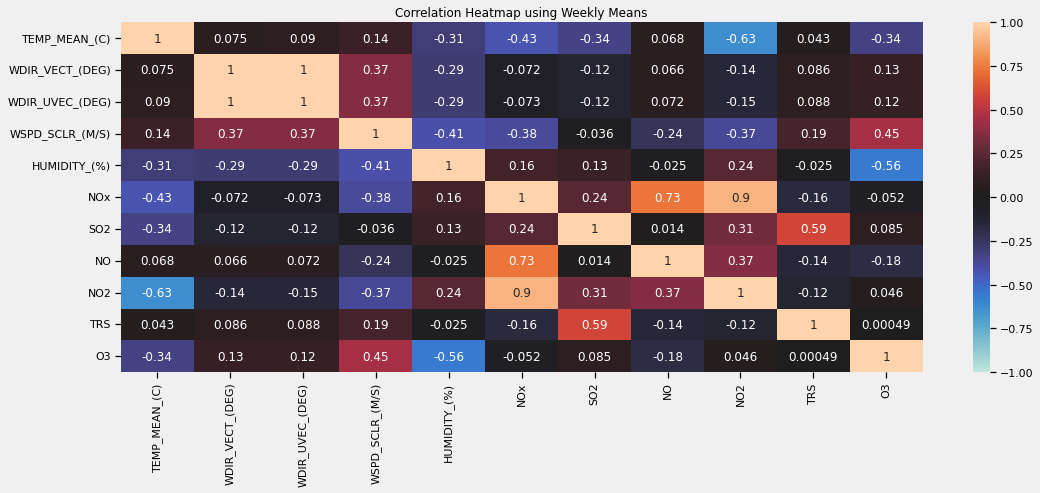

In [36]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(aq_weather_weekly.corr(), vmin=-1, vmax=1, annot=True, cmap='icefire')

heatmap.set_title('Correlation Heatmap using Weekly Means')

Text(0.5, 1.0, 'Correlation Heatmap using Monthly Means')

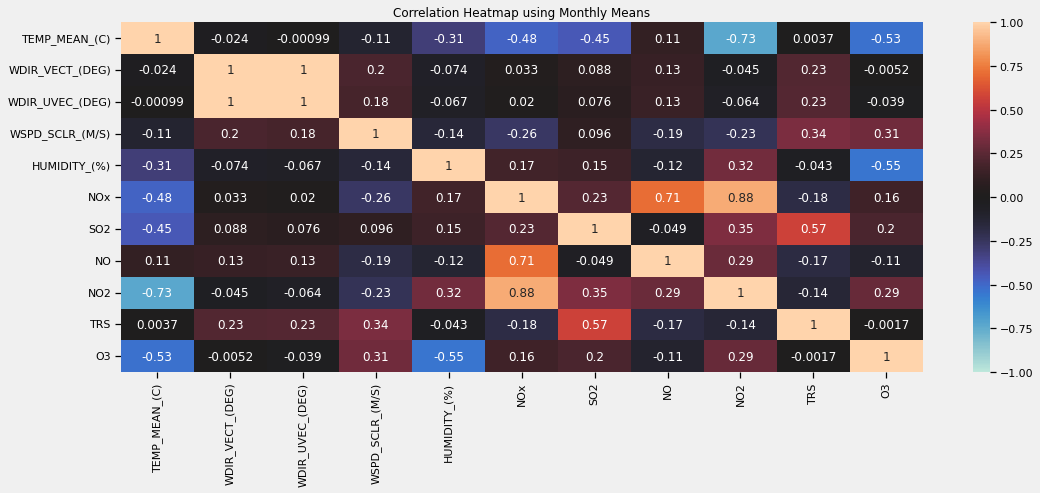

In [37]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(aq_weather_monthly.corr(), vmin=-1, vmax=1, annot=True, cmap='icefire')

heatmap.set_title('Correlation Heatmap using Monthly Means')